# Machine Learning Model for COVID-19 testing
Dataset available at: https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv

This dataset contains data on patients who tested for COVID-18 on Albert Einstein Hospital, in São Paulo, Brazil. Has features such as 
leukocytes, protein, creatinine and others. 

Question to be answered: is it to possible to build a prediction modelthat can tell, based on the dataset attributes, if the person will test positive or negative to COVID-19?

**This project was designed merely for learning purposes and based on the AI Crash Course by Diogo Cortis, available on YouTube: https://www.youtube.com/watch?v=ecYpXd4WREk. It's use for medical purpose is forbidden and imprecise.**

### Exploratory Analysis

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# attributing the dataset to a dataframe and specifying 'delimiter' so it can read properly
dataset = pd.read_csv('https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/ArvoreDecis%C3%A3o/dataset_einstein.csv', 
                      delimiter=';')
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.shape

(5644, 11)

In [4]:
# checking the amount of negative x positive results for covid testing
print(dataset['SARS-Cov-2 exam result'].value_counts())

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64


In [5]:
# checking for missing data
dataset.isnull().sum().sort_values(ascending=False).head()

Creatinine                  5220
Proteina C reativa mg/dL    5138
Basophils                   5042
Leukocytes                  5042
Hemoglobin                  5041
dtype: int64

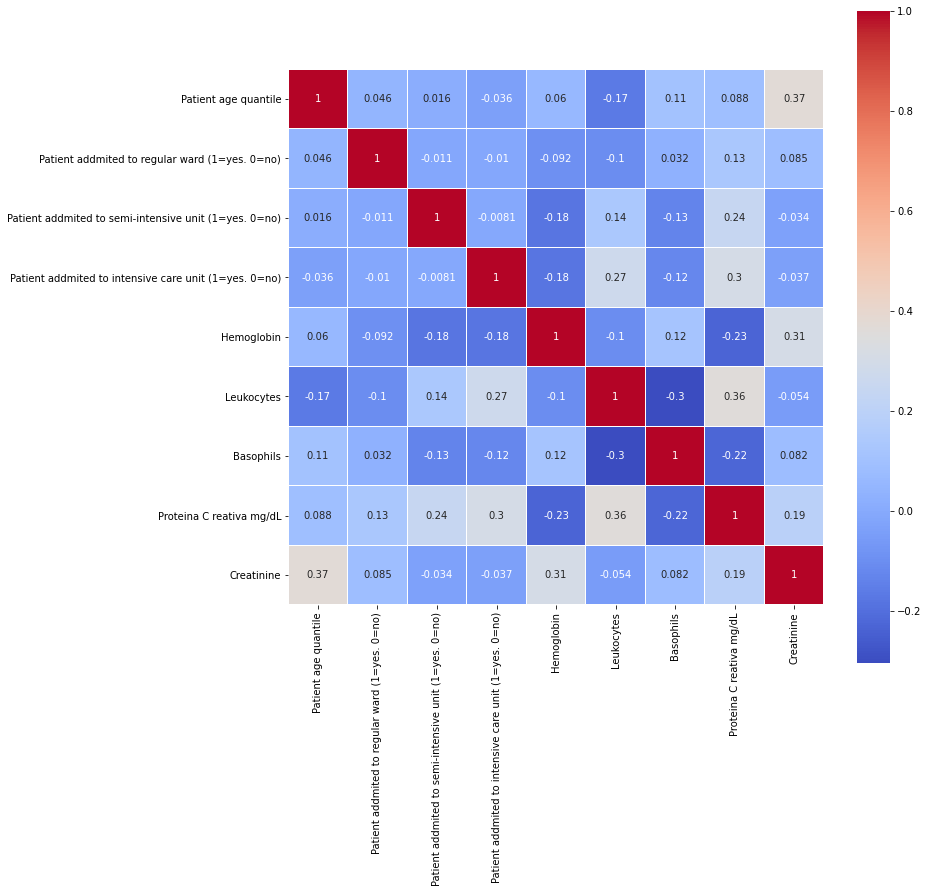

In [6]:
# building a heatmap for corrrlation
# annot = True gives the numbers on the corr matrix
# linewidths=0.2 make the lines larger for better visualization
# cmap='coolwarm' facilitates visualization through collors
# square = True asserts the legend into the heatmap properly
plt.figure(figsize=(12,12))
sns.heatmap(data=dataset.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);

- Acccording to the correlation matrix, the level of Leukocyts is one of the features that are highly correlated to COVID testing. 
- Along with that, 'patient addmited to regular ward' is the second on the line of correlation. 
- We shouldn't use this variable in our training model tho: since it's a pandemia, the majority of the patinets addmited will usually be related to testing for the disease.

### Handling missing data
There are a lot of rows that don't have all of the data filled out. Since is a health matter, It doesn't seem smart to assign mean or median. Therefore, I've decided to drop those rows. 

In [7]:
# dropping missing data
dataset = dataset.dropna()

In [8]:
dataset.shape

(357, 11)

In [9]:
# checking if we have a ballanced amount of negative and positive results
print(dataset['SARS-Cov-2 exam result'].value_counts())

negative    302
positive     55
Name: SARS-Cov-2 exam result, dtype: int64


### Basic Data cleaning
- model can only handle features that are numeric
- need to convert this dataset into an Array Numpy for the algorithm to work
- split the dataset in two: target variable and indepent variables

In [10]:
# transforming the target variable in binomial 0 - 1
dataset['SARS-Cov-2 exam result'] = [0 if x == 'negative' else 1 for x in dataset['SARS-Cov-2 exam result']]

In [11]:
dataset.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,0,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,0,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,0,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,0,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,0,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


In [12]:
# creating the target variable dataset (y)
y = dataset['SARS-Cov-2 exam result']
print(y)

1       0
8       0
28      0
29      0
30      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: SARS-Cov-2 exam result, Length: 357, dtype: int64


In [13]:
# creating the independent variable dataset (X)
X = dataset[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL', 'Creatinine']].values
print(X)

[[-0.02234027 -0.09461035 -0.22376651 -0.14789495  2.08992839]
 [-0.774212    0.36455047 -0.22376651 -0.28698576 -1.83862317]
 [ 0.85484386 -0.07513076  2.52536511 -0.4340246  -0.70141089]
 ...
 [ 1.10546756 -0.5509882  -0.22376651  0.5614683  -0.49464503]
 [-2.77920342 -1.73367476 -1.14014375  0.60915661  0.4702622 ]
 [ 0.54156393 -1.28842807 -1.14014375 -0.50357002 -0.73587185]]


### Spliting data to build the model

In [14]:
# importing libs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [15]:
# splitting data
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=3)

In [16]:
# building algorith using decision tree
# criteria set for this tree: entropy
decision_tree = DecisionTreeClassifier(criterion='entropy')

In [17]:
# training the algorithm
model = decision_tree.fit(X_treino, y_treino)

In [29]:
# applying the model on TEST
prediction = model.predict(X_teste)

### Evalutating the model

In [37]:
# importing metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
# accuracy of the tree
tree_accuracy = accuracy_score(y_teste, prediction)
print(tree_accuracy)

0.8194444444444444


In [43]:
# ploting confusion matrix to see if the lack of positive testing has impacted the model
confusion_matrix = (classification_report(y_teste, prediction))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        60
           1       0.43      0.25      0.32        12

    accuracy                           0.82        72
   macro avg       0.65      0.59      0.61        72
weighted avg       0.79      0.82      0.80        72



### Conclusion
- Analysing the confusion matrix, we can see that the model has a problem when it comes to predicting positive results: he is right in 25% of the times. 
- This is due the short amount of patients who tested positive when compared to the amount who tested negative (302 neagtives against 55 positives). 
- Although our accuracy was around 82%, we would need a bigger dataset with more patients who tested positive in order to provide some sort of reliable prediction. 